`stripplot` 和 `swarmplot` 都是 Seaborn 中用于展示 **分类变量 vs 数值变量** 关系的散点图变体，但它们在数据点排列方式和适用场景上有显著区别。以下是它们的对比：

### **核心区别**
| 特性                | `stripplot` (带状散点图)              | `swarmplot` (蜂群图)                  |
|---------------------|--------------------------------------|--------------------------------------|
| **数据点排列**       | 随机抖动（允许重叠）                  | 自动避让（避免重叠）                  |
| **适用数据量**       | 中小型到大型数据集（可调抖动）        | 小型到中型数据集（避免重叠计算复杂）  |
| **可读性**          | 重叠多时可能混乱                      | 无重叠，分布清晰                      |
| **性能**            | 快（仅随机抖动）                      | 慢（需计算点位置避免碰撞）            |
| **默认参数**        | `jitter=True`（轻微抖动）             | `dodge=False`（默认不分层）           |

### **如何选择？**
- **用 `stripplot` 当**：
  - 数据量较大（如 >500 点）。
  - 不需要精确观察每个点的位置。
  - 希望快速绘制。
- **用 `swarmplot` 当**：
  - 数据量较小（如 <200 点）。
  - 需要清晰展示分布密度和离群值。
  - 愿意牺牲一些性能换取更好的可读性。

### **解决 `swarmplot` 的警告**
如果出现警告：
```
UserWarning: XX% of the points cannot be placed...
```
- **调整方法**：
  - 减小点大小：`size=2`（默认 5）。
  - 改用 `stripplot` + `jitter`。
  - 减少数据量（如抽样或聚合）。

### **总结**
- **`stripplot`**：简单粗暴，适合大数据，允许重叠。
- **`swarmplot`**：优雅精确，适合小数据，避免重叠。
- **选择优先级**：数据量 > 可读性需求 > 计算性能。

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
16,Adelie,Torgersen,38.7,19.0,195.0,3450.0,FEMALE
44,Adelie,Dream,37.0,16.9,185.0,3000.0,FEMALE
131,Adelie,Torgersen,43.1,19.2,197.0,3500.0,MALE
329,Gentoo,Biscoe,48.1,15.1,209.0,5500.0,MALE
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,FEMALE
124,Adelie,Torgersen,35.2,15.9,186.0,3050.0,FEMALE
335,Gentoo,Biscoe,55.1,16.0,230.0,5850.0,MALE
165,Chinstrap,Dream,52.0,18.1,201.0,4050.0,MALE
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE


[Text(145.625, 0.5, ''),
 Text(0.5, 55.249999999999986, 'Body Mass (g)'),
 Text(0.5, 1.0, 'Penguin Body Mass by Sex and Species')]

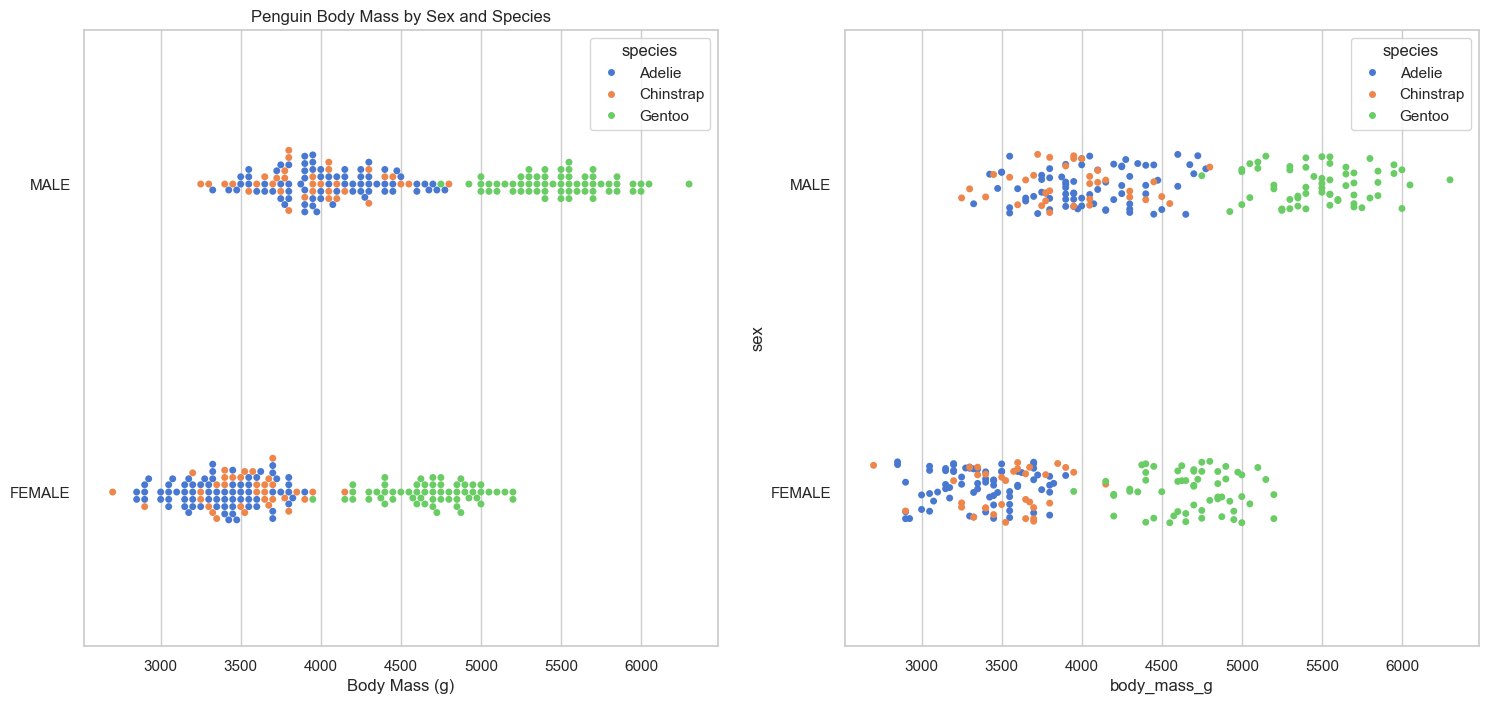

In [2]:
sns.set_theme(
    style="whitegrid",  # 使用白色背景+网格线，适合展示分布数据。
    palette="muted"     # 使用柔和的颜色调色板，避免过于鲜艳的颜色冲突。
    )

# 从 Seaborn 内置数据集加载企鹅数据。该数据集包含 344 只企鹅 的以下信息：
# species（物种）：Adelie, Gentoo, Chinstrap
# island（岛屿）：Torgersen, Biscoe, Dream
# bill_length_mm（喙长）、bill_depth_mm（喙深）
# flipper_length_mm（鳍肢长度）
# body_mass_g（体重，克）
# sex（性别）：Male, Female
penguins = pd.read_csv("seaborn-data/penguins.csv")
display(penguins.sample(10))

fig = plt.figure(figsize=(18, 8))
axes= fig.subplots(1,2)

# 绘制蜂群图，避免数据点重叠，适合展示分布和密度。
# Draw a categorical scatterplot to show each observation
ax1 = sns.swarmplot(data=penguins, x="body_mass_g", y="sex", hue="species", ax=axes[0])
ax2 = sns.stripplot(data=penguins, x="body_mass_g", y="sex", hue="species", ax=axes[1])
# 优化标签
ax1.set(
    ylabel="", 
    xlabel="Body Mass (g)", 
    title="Penguin Body Mass by Sex and Species"
)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
86,0,3,male,16.0,1,3,34.3750,S,Third,man,True,NaN,Southampton,no,False
335,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
64,0,1,male,NaN,0,0,27.7208,C,First,man,True,NaN,Cherbourg,no,True
459,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
684,0,2,male,60.0,1,1,39.0000,S,Second,man,True,NaN,Southampton,no,False
134,0,2,male,25.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
443,1,2,female,28.0,0,0,13.0000,S,Second,woman,False,NaN,Southampton,yes,True
598,0,3,male,NaN,0,0,7.2250,C,Third,man,True,NaN,Cherbourg,no,True
692,1,3,male,NaN,0,0,56.4958,S,Third,man,True,NaN,Southampton,yes,True


c:\Users\dzzw\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 55.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dzzw\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 29.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='embarked', ylabel='fare'>

c:\Users\dzzw\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dzzw\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dzzw\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 40.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\dzzw\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 62.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, U

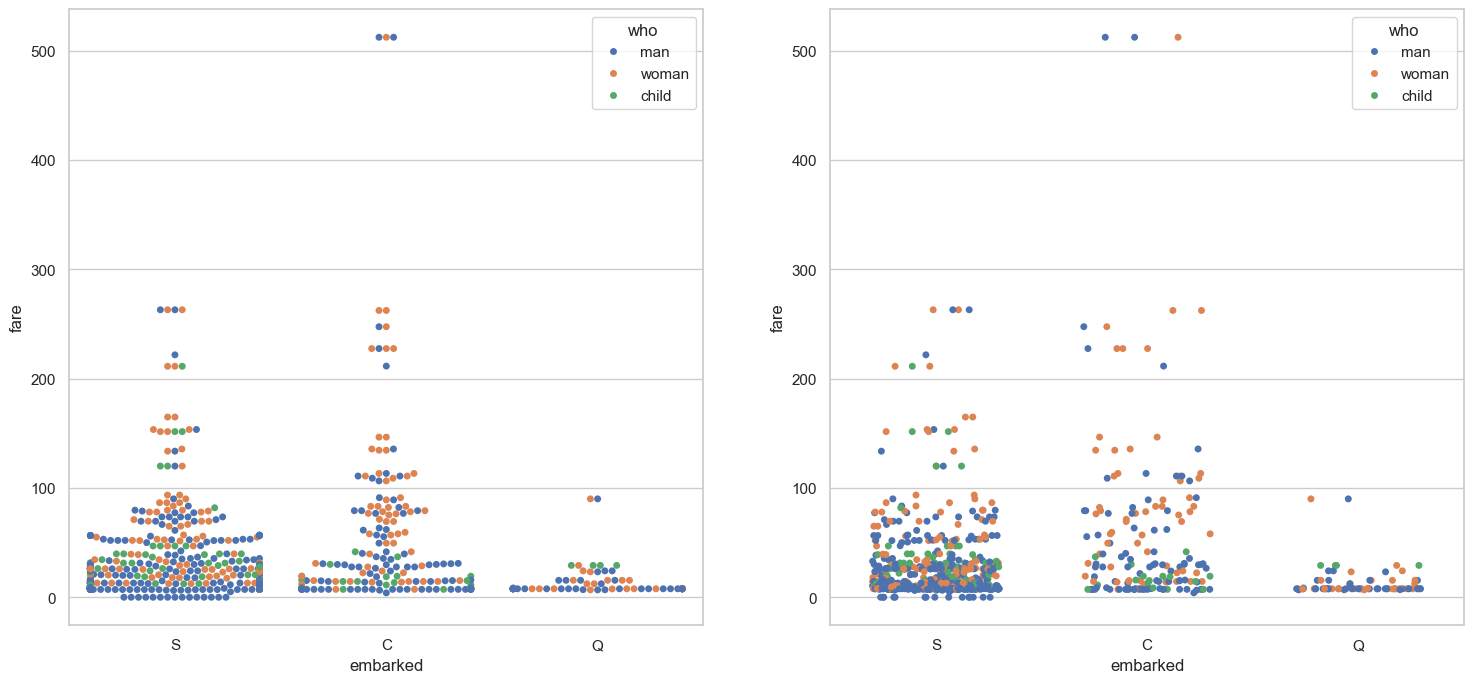

In [36]:
sns.set_theme(style="whitegrid")
titanic = pd.read_csv("seaborn-data/titanic.csv")
display(titanic.sample(10))

fig = plt.figure(figsize=(18, 8))
axes= fig.subplots(1,2)
sns.swarmplot(x='embarked',y='fare',hue='who',data=titanic,ax=axes[0])
sns.stripplot(x='embarked',y='fare',hue='who',data=titanic,jitter=0.3,ax=axes[1])